# Prepare the Dataset

In [5]:
# Split the dataset
!python split_dataset_tvt.py --train 90 --validation 10 --folder root_data/train --dest data/train_dataset

In [6]:
import os

# Đường dẫn tới các thư mục
train_images_path = './data/train_dataset/images/train'
val_images_path = './data/train_dataset/images/val'

# Đếm số lượng file ảnh trong một thư mục
def count_images(path):
    return len([file for file in os.listdir(path) if file.endswith(('.jpg', '.png'))])

# Đếm số lượng ảnh trong các thư mục train và val
train_images_count = count_images(train_images_path)
val_images_count = count_images(val_images_path)

print(f"Số lượng ảnh trong thư mục train: {train_images_count}")
print(f"Số lượng ảnh trong thư mục val: {val_images_count}")

Số lượng ảnh trong thư mục train: 10367
Số lượng ảnh trong thư mục val: 1154


# Training

In [7]:
model_yaml = "config_model/yolov8/yolov8l-DySample.yaml"
base_model = "yolov8l.pt"
data_yaml = "data/train_dataset/data.yaml"
name = "yolov8l_DySample"

In [8]:
!python start_train.py --yaml $model_yaml --model $base_model --data $data_yaml --name $name --workers 8 --batch 16 --device 0 --epochs 100 --patience 50 --hsv_h 0.015 --hsv_s 0.7 --hsv_v 0.4 --degrees 0 --translate 0.1 --scale 0.5 --mosaic 1.0 --mixup 0.0 --flipud 0 --fliplr 0.5 --shear 0.0 --perspective 0.0 --lr0 0.01 --lrf 0.01 --momentum 0.95 --weight_decay 0.0001 --warmup_epochs 10 --warmup_momentum 0.5 --warmup_bias_lr 0.1 --optimizer SGD

Transferred 491/601 items from pretrained weights
New https://pypi.org/project/ultralytics/8.3.51 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.22 🚀 Python-3.11.9 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 15970MiB)
engine/trainer: task=detect, mode=train, model=config_model/yolov8/yolov8l-DySample.yaml, data=data/train_dataset/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=runs/train, name=yolov8l_DySample, exist_ok=False, pretrained=True, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visuali

# Resume (Optional)

In [9]:
!python resume_train.py --model ./runs/train/yolov8l_DySample/weights/last.pt

New https://pypi.org/project/ultralytics/8.3.51 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.22 🚀 Python-3.11.9 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 15970MiB)
engine/trainer: task=detect, mode=train, model=runs/train/yolov8l_DySample/weights/last.pt, data=data/train_dataset/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=runs/train, name=yolov8l_DySample, exist_ok=False, pretrained=True, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=runs/train/yolov8l_DySample/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize=False, 

# Predict on validation set

In [17]:
!python validation.py --model runs/train/yolov8l_DySample/weights/best.pt --split val --data_dir $data_yaml --name yolov8l_DySample_val

Ultralytics 8.3.22 🚀 Python-3.11.9 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 15970MiB)
YOLOv8l-DySample summary (fused): 270 layers, 76,728,220 parameters, 0 gradients, 192.0 GFLOPs
val: Scanning /home/thang/MySpace/Traffic-Vehicle-Detection-BKAI/data/train_data
val: WARNING ⚠️ /home/thang/MySpace/Traffic-Vehicle-Detection-BKAI/data/train_dataset/images/val/cam_02_00951.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /home/thang/MySpace/Traffic-Vehicle-Detection-BKAI/data/train_dataset/images/val/cam_04_00947.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1154      12737      0.895      0.893      0.936      0.698
                xe máy        972       8327      0.914      0.899      0.959      0.646
           xe ô tô con        797       2398      0.915      0.933      0.962      0.741
Xe vận tải du lịch (xe khách)        508        694      0.921      0.863      0.936      0.7

# Predict on test set (public test)

In [19]:
!python validation.py --model runs/train/yolov8l_DySample/weights/best.pt --split test --data_dir $data_yaml --name yolov8l_DySample_test

Ultralytics 8.3.22 🚀 Python-3.11.9 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 15970MiB)
YOLOv8l-DySample summary (fused): 270 layers, 76,728,220 parameters, 0 gradients, 192.0 GFLOPs
val: Scanning /home/thang/MySpace/Traffic-Vehicle-Detection-BKAI/root_data/publi
WARNING ⚠️ No labels found in /home/thang/MySpace/Traffic-Vehicle-Detection-BKAI/root_data/public_test.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       2060          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels
Speed: 0.2ms preprocess, 10.8ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/test/yolov8l_DySample_test


# Zip predict file

In [20]:
import os
import zipfile

def aggregate_predictions(labels_dir, output_file):
    with open(output_file, 'w') as outfile:
        for txt_file in os.listdir(labels_dir):
            if txt_file.endswith('.txt'):
                image_name = txt_file.replace('.txt', '.jpg')
                with open(os.path.join(labels_dir, txt_file), 'r') as infile:
                    for line in infile:
                        outfile.write(f"{image_name} {line.strip()}\n")

def zip_file(file_path, zip_path):
    with zipfile.ZipFile(zip_path, 'w') as zipf:
        zipf.write(file_path, os.path.basename(file_path))

# Đường dẫn tới thư mục chứa các file nhãn
labels_dir = 'runs/test/yolov8l_DySample_test/labels'

# Tên file đầu ra
output_file = 'predict.txt'
# Tên file zip đầu ra
zip_path = 'predict.zip'

# Tổng hợp các file dự đoán thành một file predict.txt
aggregate_predictions(labels_dir, output_file)

# Nén file predict.txt thành predict.zip
zip_file(output_file, zip_path)

print(f"File dự đoán đã được tổng hợp và nén thành công")

File dự đoán đã được tổng hợp và nén thành công


# View result

In [21]:
import os
import cv2
import matplotlib.pyplot as plt

In [22]:
def load_labels(label_path):
    labels = []
    with open(label_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            label = {
                'class': int(parts[0]),
                'x_center': float(parts[1]),
                'y_center': float(parts[2]),
                'width': float(parts[3]),
                'height': float(parts[4])
            }
            labels.append(label)
    return labels

def draw_bounding_boxes(image, labels):
    h, w, _ = image.shape
    for label in labels:
        x_center = int(label['x_center'] * w)
        y_center = int(label['y_center'] * h)
        width = int(label['width'] * w)
        height = int(label['height'] * h)
        x_min = x_center - width // 2
        y_min = y_center - height // 2
        x_max = x_center + width // 2
        y_max = y_center + height // 2
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
        cv2.putText(image, str(label['class']), (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    return image

In [23]:
def display_image_with_labels(image_path, label_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    labels = load_labels(label_path)
    image_with_boxes = draw_bounding_boxes(image, labels)
    plt.figure(figsize=(10, 10))
    plt.imshow(image_with_boxes)
    plt.axis('off')
    plt.show()
    # save image
    #cv2.imwrite('image_with_boxes.jpg', cv2.cvtColor(image_with_boxes, cv2.COLOR_RGB2BGR))

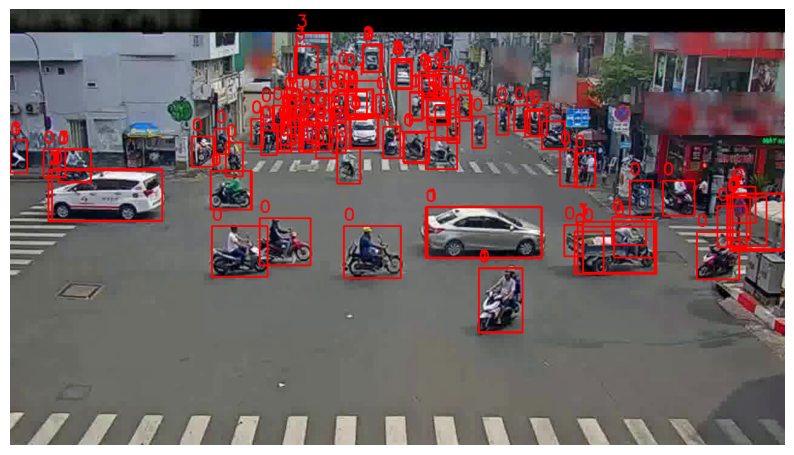

In [24]:
image_path = './root_data/public_test/cam_10_00695.jpg'
# label_path = './runs/detect/yolov11-vehicle-tuning-test3/labels/cam_10_00693.txt'
label_path = './runs/test/yolov8l_DySample_test/labels/cam_10_00695.txt'

display_image_with_labels(image_path, label_path)

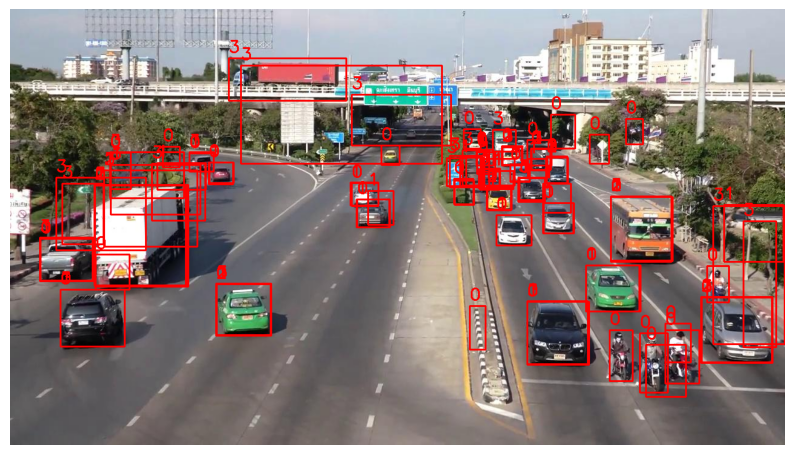

In [25]:
image_name = 'src_1_frame_205_jpg.rf.f372ffd765ab8ec18f0bbef26d4537bb'

image_path = f'./root_data/public_test/{image_name}.jpg'
label_path = f'./runs/test/yolov8l_DySample_test/labels/{image_name}.txt'

display_image_with_labels(image_path, label_path)

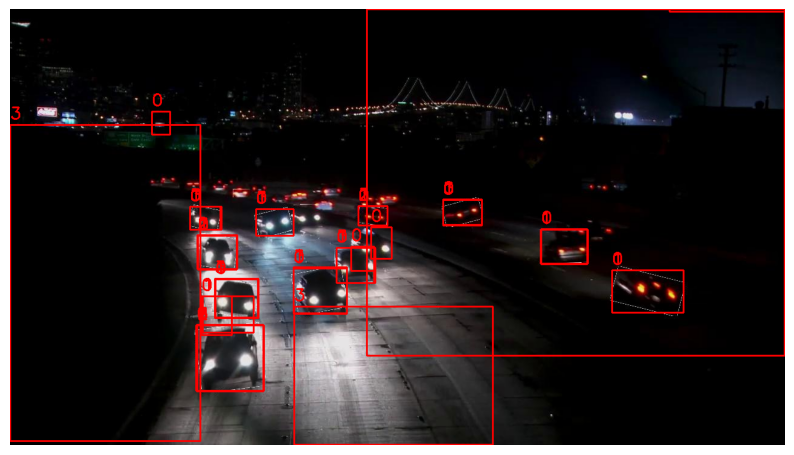

In [26]:
image_name = 'src_2_frame_169-_jpg.rf.da143fd32d7174d503deaaea272c62cd'

image_path = f'./root_data/public_test/{image_name}.jpg'
label_path = f'./runs/test/yolov8l_DySample_test/labels/{image_name}.txt'

display_image_with_labels(image_path, label_path)

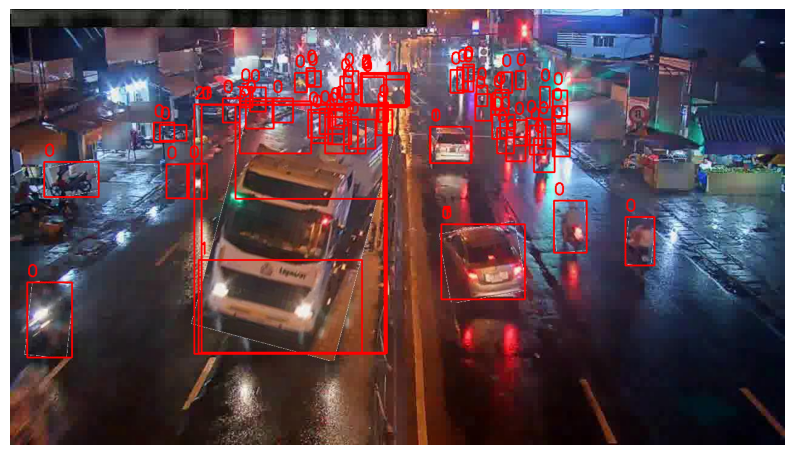

In [27]:
image_name = 'cam_08_00518_jpg.rf.9bc60d765e318913475c3f44ad296a26'

image_path = f'./root_data/public_test/{image_name}.jpg'
label_path = f'./runs/test/yolov8l_DySample_test/labels/{image_name}.txt'

display_image_with_labels(image_path, label_path)

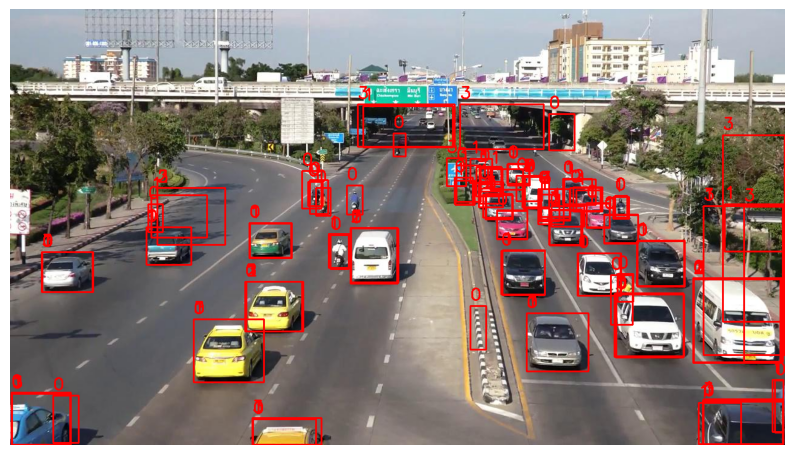

In [29]:
image_name = "src_1_frame_141_jpg.rf.b5143cd3c5d9b815a6e5380add41b59f"

image_path = f'./root_data/public_test/{image_name}.jpg'
label_path = f'./runs/test/yolov8l_DySample_test/labels/{image_name}.txt'

display_image_with_labels(image_path, label_path)

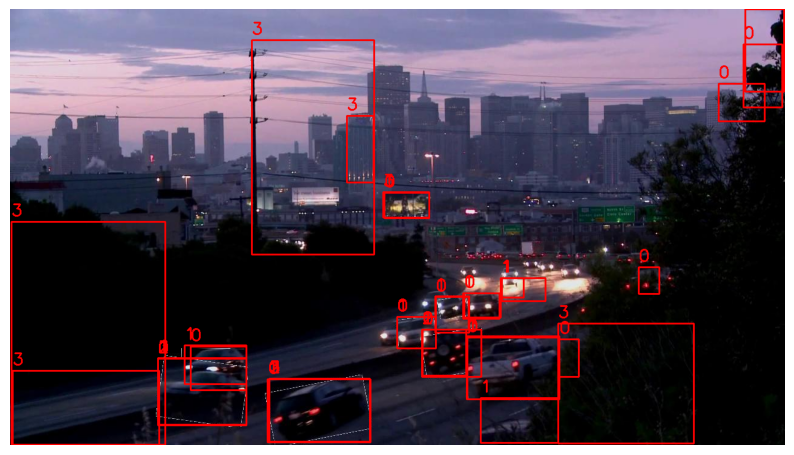

In [30]:
image_name = "src_2_frame_236-_jpg.rf.6bfe5740de02dd44f1dd677dbf53d878"

image_path = f'./root_data/public_test/{image_name}.jpg'
label_path = f'./runs/test/yolov8l_DySample_test/labels/{image_name}.txt'

display_image_with_labels(image_path, label_path)

# View result with NMS

In [21]:
import cv2

iou_threshold = 0.9
score_threshold = 0.1

In [22]:
def non_max_suppression(boxes, scores, iou_threshold):
    if len(boxes) == 0:
        return []
    indices = cv2.dnn.NMSBoxes(boxes, scores, score_threshold=score_threshold, nms_threshold=iou_threshold)
    if len(indices) == 0:
        return []
    return [boxes[i] for i in indices.flatten()]

In [23]:
import matplotlib.pyplot as plt

def display_image_with_labels_nms(image_path, label_path):
    image = cv2.imread(image_path)
    height, width, _ = image.shape
    
    with open(label_path, 'r') as file:
        lines = file.readlines()
    
    boxes = []
    scores = []
    labels = []
    for line in lines:
        parts = line.strip().split()
        class_id = int(parts[0])
        x_center = float(parts[1]) * width
        y_center = float(parts[2]) * height
        box_width = float(parts[3]) * width
        box_height = float(parts[4]) * height
        confidence = float(parts[5])
        x1 = int(x_center - box_width / 2)
        y1 = int(y_center - box_height / 2)
        x2 = int(x_center + box_width / 2)
        y2 = int(y_center + box_height / 2)
        boxes.append([x1, y1, x2, y2])
        scores.append(confidence)
        labels.append(class_id)
    
    # Apply Non-Maximum Suppression
    nms_boxes = non_max_suppression(boxes, scores, iou_threshold=iou_threshold)
    
    for box in nms_boxes:
        x1, y1, x2, y2 = box
        label = labels[boxes.index(box)]
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, f'{label}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    
    # Convert BGR image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display the image using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

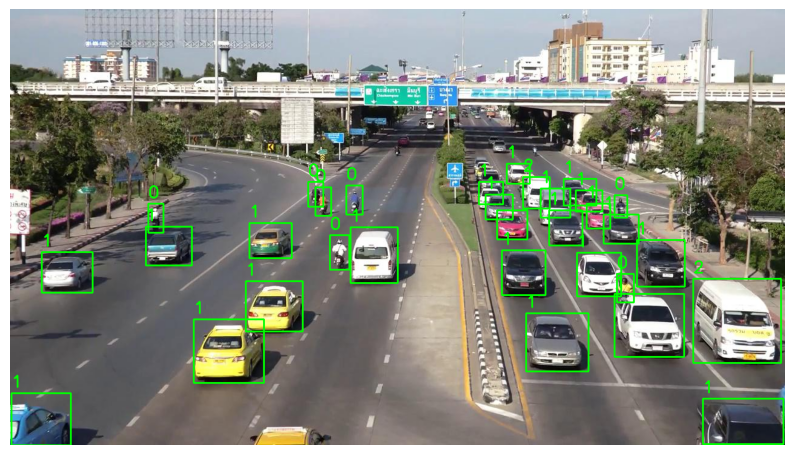

In [24]:
image_name = "src_1_frame_141_jpg.rf.b5143cd3c5d9b815a6e5380add41b59f"

image_path = './root_data/public_test/' + image_name + '.jpg'
label_path = f'./runs/test/yolov8l_DySample_test/labels/{image_name}.txt'

# Display image with labels
display_image_with_labels_nms(image_path, label_path)

# Applied NMS to labels

In [ ]:
import os
import cv2

iou_threshold = 0.9
score_threshold = 0.1

In [ ]:
def non_max_suppression(boxes, scores, iou_threshold):
    if len(boxes) == 0:
        return []
    indices = cv2.dnn.NMSBoxes(boxes, scores, score_threshold=score_threshold, nms_threshold=iou_threshold)
    if len(indices) == 0:
        return []
    return [boxes[i] for i in indices.flatten()]

def apply_nms_to_labels(src_folder, dst_folder, iou_threshold=iou_threshold):
    if not os.path.exists(dst_folder):
        os.makedirs(dst_folder)
    
    label_files = [f for f in os.listdir(src_folder) if f.endswith('.txt')]
    file_count = 0
    
    for label_file in label_files:
        src_label_path = os.path.join(src_folder, label_file)
        dst_label_path = os.path.join(dst_folder, label_file)
        
        with open(src_label_path, 'r') as file:
            lines = file.readlines()
        
        if not lines:
            # If the file is empty, copy it directly to the destination
            with open(dst_label_path, 'w') as file:
                pass
            file_count += 1
            continue
        
        boxes = []
        scores = []
        labels = []
        for line in lines:
            parts = line.strip().split()
            class_id = int(parts[0])
            x_center = float(parts[1])
            y_center = float(parts[2])
            box_width = float(parts[3])
            box_height = float(parts[4])
            confidence = float(parts[5])
            x1 = x_center - box_width / 2
            y1 = y_center - box_height / 2
            x2 = x_center + box_width / 2
            y2 = y_center + box_height / 2
            boxes.append([x1, y1, x2, y2])
            scores.append(confidence)
            labels.append(class_id)
        
        # Apply Non-Maximum Suppression
        nms_boxes = non_max_suppression(boxes, scores, iou_threshold)
        
        if not nms_boxes:
            # If no boxes remain after NMS, copy the original file to the destination
            with open(dst_label_path, 'w') as file:
                file.writelines(lines)
        else:
            with open(dst_label_path, 'w') as file:
                for box in nms_boxes:
                    x1, y1, x2, y2 = box
                    label = labels[boxes.index(box)]
                    x_center = (x1 + x2) / 2
                    y_center = (y1 + y2) / 2
                    box_width = x2 - x1
                    box_height = y2 - y1
                    confidence = scores[boxes.index(box)]
                    file.write(f"{label} {x_center} {y_center} {box_width} {box_height} {confidence}\n")
        
        file_count += 1
    
    print(f"Applied NMS to {file_count} files in {src_folder} and saved to {dst_folder}.")

In [ ]:
# Define the paths
src_folder = './runs/test/test_yolov8_DS/labels'
dst_folder = './runs/test/test_yolov8_DS_NMS/labels'

# Apply NMS to labels and save to new folder
apply_nms_to_labels(src_folder, dst_folder)

print("NMS has been applied and results saved successfully.")